In [ ]:
# from https://git.ligo.org/lscsoft/bilby/blob/master/examples/core_examples/linear_regression_unknown_noise.py

In [1]:
"""
An example of how to use bilby to perform parameter estimation for
non-gravitational wave data. In this case, fitting a linear function to
data with background Gaussian noise with unknown variance.

"""
from __future__ import division
import bilby
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A few simple setup steps
label = 'linear_regression_unknown_noise'
outdir = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)


In [3]:
# First, we define our "signal model", in this case a simple linear function
def model(time, m, c):
    return time * m + c

In [5]:
# Now we define the injection parameters which we make simulated data with
injection_parameters = dict(m=0.5, c=0.2)

# For this example, we'll inject standard Gaussian noise
sigma = 1

# These lines of code generate the fake data. Note the ** just unpacks the
# contents of the injection_parameters when calling the model function.
sampling_frequency = 10
time_duration = 10
time = np.arange(0, time_duration, 1 / sampling_frequency)
N = len(time)
data = model(time, **injection_parameters) + np.random.normal(0, sigma, N)

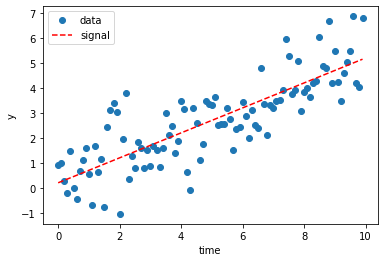

In [6]:

# We quickly plot the data to check it looks sensible
fig, ax = plt.subplots()
ax.plot(time, data, 'o', label='data')
ax.plot(time, model(time, **injection_parameters), '--r', label='signal')
ax.set_xlabel('time')
ax.set_ylabel('y')
ax.legend()
fig.savefig('{}/{}_data.png'.format(outdir, label))

In [7]:
injection_parameters.update(dict(sigma=1))

# Now lets instantiate the built-in GaussianLikelihood, giving it
# the time, data and signal model. Note that, because we do not give it the
# parameter, sigma is unknown and marginalised over during the sampling
likelihood = bilby.core.likelihood.GaussianLikelihood(time, data, model)

priors = dict()
priors['m'] = bilby.core.prior.Uniform(0, 5, 'm')
priors['c'] = bilby.core.prior.Uniform(-2, 2, 'c')
priors['sigma'] = bilby.core.prior.Uniform(0, 10, 'sigma')

In [8]:
# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)

15:46 bilby INFO    : Running for label 'linear_regression_unknown_noise', output will be saved to 'outdir'
15:46 bilby INFO    : Search parameters:
15:46 bilby INFO    :   m = Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
15:46 bilby INFO    :   c = Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
15:46 bilby INFO    :   sigma = Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)
15:46 bilby INFO    : Single likelihood evaluation took 1.583e-04 s


0it [00:00, ?it/s]

15:46 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x1a268bf650>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
15:46 bilby INFO    : Checkpoint every check_point_delta_t = 600s
15:46 bilby INFO    : Using dynesty version 1.0.1
15:46 bilby INFO    : Resume file outdir/linear_regression_unkn

6574it [00:06, 1041.72it/s, bound:35 nc:1 ncall:28698 eff:22.9% logz=-152.90+/-0.19 dlogz:0.105>0.10] 

15:46 bilby INFO    : Written checkpoint file outdir/linear_regression_unknown_noise_resume.pickle
15:46 bilby INFO    : Writing 1607 current samples to outdir/linear_regression_unknown_noise_samples.dat


6596it [00:10, 620.79it/s, bound:35 nc:1 ncall:28740 eff:24.7% logz=-152.81+/-0.20 dlogz:0.000>0.10] 



15:46 bilby INFO    : Sampling time: 0:00:06.231948
15:46 bilby INFO    : Summary of results:
nsamples: 7096
ln_noise_evidence:    nan
ln_evidence: -152.810 +/-  0.196
ln_bayes_factor:    nan +/-  0.196



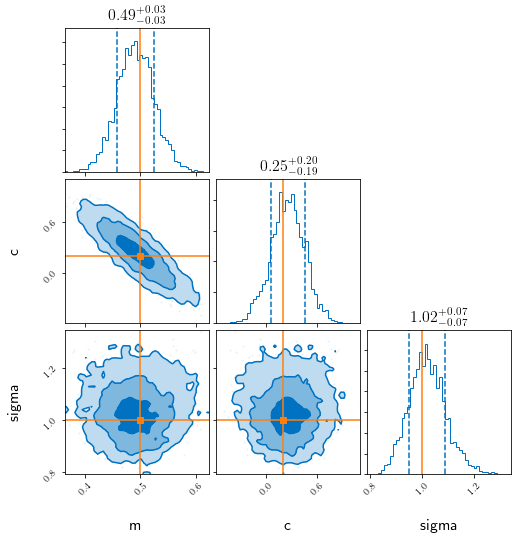

In [9]:
result.plot_corner()